In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


In [2]:
file_path = "./german.data"

df = pd.read_csv(file_path, sep=" ", header=None)

print(df.head())

    0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  
2  A152  1  A172  2  A191  A201  1  
3  A153  1  A173  2  A191  A201  1  
4  A153  2  A173  2  A191  A201  2  

[5 rows x 21 columns]


In [3]:
column_names = [
    "Checking_Acc_Status", "Duration (in months)", "Credit_History", "Purpose",
    "Credit_Amount", "Savings_Acc", "Employment", "Installment_Rate",
    "Personal_Status", "Other_Debtors", "Residence_Since", "Property",
    "Age", "Other_Installment", "Housing", "Existing_Credits",
    "Job", "Num_People_Maintained", "Telephone", "Foreign_Worker", "Credit Standing"
]
# Assign column names
df.columns = column_names

mappings = {
    "Checking_Acc_Status": {
        "A11": "< 0 DM",
        "A12": "0-200 DM",
        "A13": ">= 200 DM or Salary Assigned",
        "A14": "No Checking Account"
    },
    "Credit_History": {
        "A30": "No Credit Taken / All Paid",
        "A31": "All Paid (Same Bank)",
        "A32": "All Paid (Other Banks)",
        "A33": "Past Delays in Payment",
        "A34": "Critical Account / Other Existing Credits"
    },
    "Purpose": {
        "A40": "New Car",
        "A41": "Used Car",
        "A42": "Furniture/Equipment",
        "A43": "Radio/TV",
        "A44": "Domestic Appliances",
        "A45": "Repairs",
        "A46": "Education",
        "A47": "Vacation",
        "A48": "Retraining",
        "A49": "Business",
        "A410": "Others"
    },
    "Savings_Acc": {
        "A61": "< 100 DM",
        "A62": "100-500 DM",
        "A63": "500-1000 DM",
        "A64": ">= 1000 DM",
        "A65": "No Savings Account"
    },
    "Employment": {
        "A71": "Unemployed",
        "A72": "< 1 Year",
        "A73": "1-4 Years",
        "A74": "4-7 Years",
        "A75": ">= 7 Years"
    },
    "Personal_Status": {
        "A91": "Male: Divorced/Separated",
        "A92": "Female: Divorced/Separated/Married",
        "A93": "Male: Single",
        "A94": "Male: Married/Widowed",
        "A95": "Female: Single"
    },
    "Other_Debtors": {
        "A101": "None",
        "A102": "Co-applicant",
        "A103": "Guarantor"
    },
    "Property": {
        "A121": "Real Estate",
        "A122": "Building Society Savings / Life Insurance",
        "A123": "Car or Other Property",
        "A124": "No Property"
    },
    "Other_Installment": {
        "A141": "Bank",
        "A142": "Stores",
        "A143": "None"
    },
    "Housing": {
        "A151": "Rent",
        "A152": "Own",
        "A153": "For Free"
    },
    "Job": {
        "A171": "Unemployed / Unskilled (Non-Resident)",
        "A172": "Unskilled (Resident)",
        "A173": "Skilled Employee / Official",
        "A174": "Management / Self-Employed / Highly Qualified"
    },
    "Telephone": {
        "A191": "No Telephone",
        "A192": "Yes, Registered"
    },
    "Foreign_Worker": {
        "A201": "Yes",
        "A202": "No"
    }
}

for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

# Print updated DataFrame
print(df.head())

   Checking_Acc_Status  Duration (in months)  \
0               < 0 DM                     6   
1             0-200 DM                    48   
2  No Checking Account                    12   
3               < 0 DM                    42   
4               < 0 DM                    24   

                              Credit_History              Purpose  \
0  Critical Account / Other Existing Credits             Radio/TV   
1                     All Paid (Other Banks)             Radio/TV   
2  Critical Account / Other Existing Credits            Education   
3                     All Paid (Other Banks)  Furniture/Equipment   
4                     Past Delays in Payment              New Car   

   Credit_Amount         Savings_Acc  Employment  Installment_Rate  \
0           1169  No Savings Account  >= 7 Years                 4   
1           5951            < 100 DM   1-4 Years                 2   
2           2096            < 100 DM   4-7 Years                 2   
3           7882

/var/folders/nk/xk4mj8ts0ps645l4yh1nyfmh0000gp/T/ipykernel_82054/1004434388.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index,


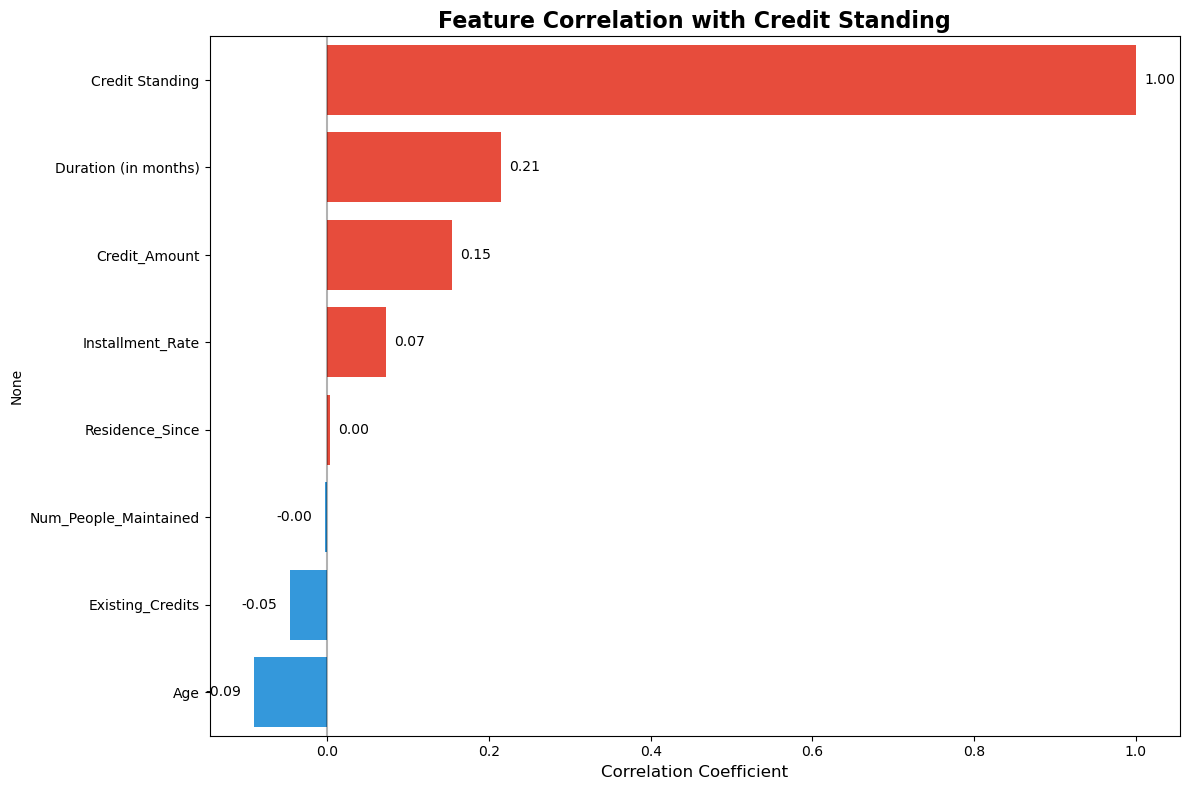

In [4]:
# 1. Correlation analysis - Place this BEFORE one-hot encoding
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation with target
correlation_with_target = df[numerical_cols].corrwith(df['Credit Standing']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, 
                  palette=sns.color_palette("RdBu_r", len(correlation_with_target)))

plt.title('Feature Correlation with Credit Standing', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Color bars based on correlation value
for i, bar in enumerate(bars.patches):
    if correlation_with_target.values[i] > 0:
        bar.set_facecolor('#e74c3c')  # Red for positive correlation
    else:
        bar.set_facecolor('#3498db')  # Blue for negative correlation

# Add correlation values as text
for i, v in enumerate(correlation_with_target.values):
    plt.text(v + 0.01 if v >= 0 else v - 0.06, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
# Convert categorical data to numerical format using one-hot encoding
df = pd.get_dummies(df, drop_first=True).astype(int)

# Map the 'Credit Standing' column from 1 (good) and 2 (bad) to 0 (good) and 1 (bad)
df['Credit Standing'] = df['Credit Standing'].map({1: 0, 2: 1})

# Ensure all categorical columns are encoded as 0s and 1s
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Print updated DataFrame
print(df.head())

   Duration (in months)  Credit_Amount  Installment_Rate  Residence_Since  \
0                     6           1169                 4                4   
1                    48           5951                 2                2   
2                    12           2096                 2                3   
3                    42           7882                 2                4   
4                    24           4870                 3                4   

   Age  Existing_Credits  Num_People_Maintained  Credit Standing  \
0   67                 2                      1                0   
1   22                 1                      1                1   
2   49                 1                      2                0   
3   45                 1                      2                0   
4   53                 2                      2                1   

   Checking_Acc_Status_< 0 DM  \
0                           1   
1                           0   
2                           0

In [6]:

# Set a more appealing visual style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333333'
plt.rcParams['ytick.color'] = '#333333'

# Custom color palette
custom_palette = ['#3498db', '#e74c3c']
custom_cmap = sns.diverging_palette(220, 10, as_cmap=True)



/var/folders/nk/xk4mj8ts0ps645l4yh1nyfmh0000gp/T/ipykernel_82054/111392532.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette=custom_palette)


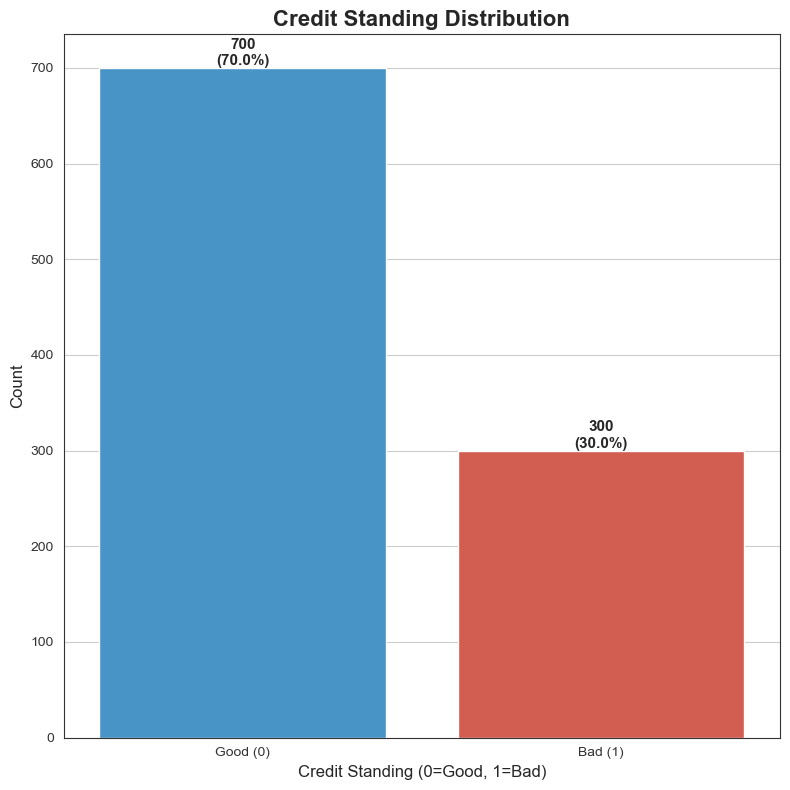

Good credits: 700 (70.00%)
Bad credits: 300 (30.00%)


In [7]:
# 1. Check class distribution in the target variable
plt.figure(figsize=(8, 8))
target_counts = df['Credit Standing'].value_counts()
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette=custom_palette)
plt.title('Credit Standing Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Standing (0=Good, 1=Bad)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Good (0)', 'Bad (1)'], fontsize=10)

# Add percentage labels
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{int(p.get_height())}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Good credits: {target_counts[0]} ({target_counts[0]/total*100:.2f}%)")
print(f"Bad credits: {target_counts[1]} ({target_counts[1]/total*100:.2f}%)")

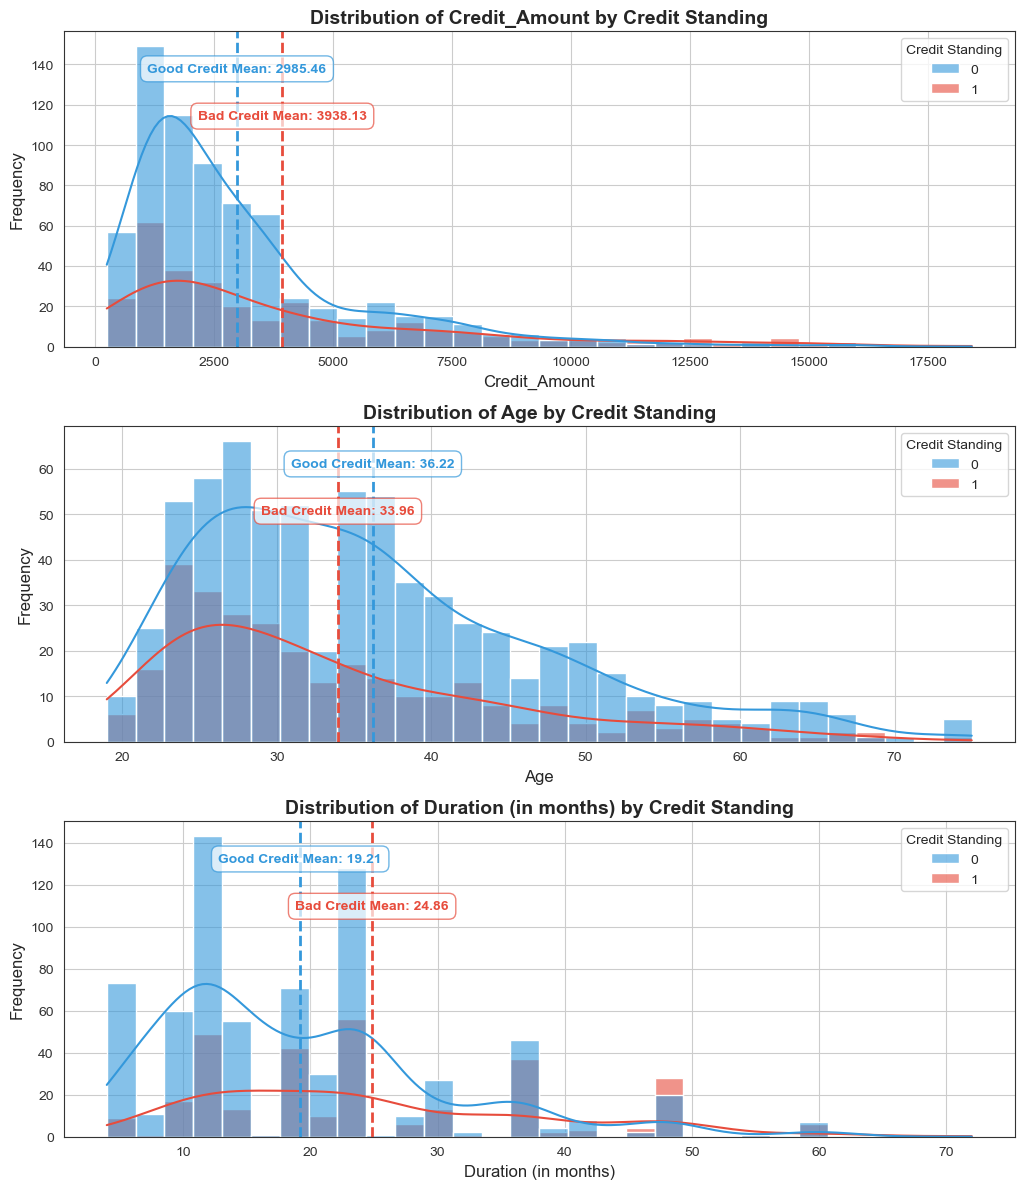

In [17]:
# 3. Feature distributions
# Select top numerical features (based on correlation or importance)
top_features = ['Credit_Amount', 'Age', 'Duration (in months)']

fig, axes = plt.subplots(len(top_features), 1, figsize=(12, 4*len(top_features)))

for i, feature in enumerate(top_features):
    # Create KDE plot with histograms
    # Fix the order of hue levels to ensure correct color mapping
    sns.histplot(data=df, x=feature, hue='Credit Standing', kde=True, 
                 palette=custom_palette, alpha=0.6, bins=30, ax=axes[i],
                 hue_order=[0, 1])  # Explicitly set order: 0=Good, 1=Bad
    
    # Customize the plot
    axes[i].set_title(f'Distribution of {feature} by Credit Standing', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
   
    # Add mean lines with non-overlapping labels
    for j, (credit_status, color, label) in enumerate(zip([0, 1], custom_palette, ['Good Credit', 'Bad Credit'])):
        subset = df[df['Credit Standing'] == credit_status]
        mean_val = subset[feature].mean()
        count = len(subset)
        percent = 100 * count / len(df)
        
        axes[i].axvline(x=mean_val, color=color, linestyle='--', linewidth=2)
        
        # Position labels at different heights to avoid overlap
        y_pos = axes[i].get_ylim()[1] * (0.9 - j*0.15)  # Stagger vertically
        
        # Add background to text for better readability
        axes[i].text(mean_val, y_pos, 
                     f'{label} Mean: {mean_val:.2f}', 
                     color=color, fontweight='bold', ha='center', va='top',
                     bbox=dict(facecolor='white', alpha=0.7, edgecolor=color, boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()